In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

file_test = open('test.p', 'rb')
file_train = open('train.p', 'rb')
file_val = open('valid.p', 'rb')
train_data = pickle.load(file_train)

#print(train_data)
#print(train_data['features'].shape)
#plt.imshow(train_data["features"][1])
train_data = {'Features' : train_data['features'], 'Labels' : train_data['labels']}
test_data = pickle.load(file_test)
test_data = {'Features' : test_data['features'], 'Labels' : test_data['labels']}
val_data = pickle.load(file_val)
val_data = {'Features' : val_data['features'], 'Labels' : val_data['labels']}
print(train_data['Labels'].shape)

(34799,)


In [2]:
batch_size = 32
img_height = 32
img_width = 32

R, G, B = train_data['Features'][:,:,:,0],train_data['Features'][:,:,:,1],train_data['Features'][:,:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
train_data['Features'] = imgGray

R, G, B = test_data['Features'][:,:,:,0],test_data['Features'][:,:,:,1], test_data['Features'][:,:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
test_data['Features'] = imgGray


R, G, B = val_data['Features'][:,:,:,0],val_data['Features'][:,:,:,1],val_data['Features'][:,:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
val_data['Features'] = imgGray


In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.2),
  layers.Conv2D(6, 5, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 5, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Dense(84, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(43)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

In [15]:
epochs=20
history = model.fit(
  x = train_data['Features'], y = train_data['Labels'] ,
  validation_data= (val_data['Features'], val_data['Labels']),
  batch_size = 64,
  epochs=epochs
)


Epoch 1/20
544/544 [==============================] - 7s 12ms/step - loss: 1.7133 - accuracy: 0.5541 - val_loss: 0.9602 - val_accuracy: 0.8154
Epoch 2/20
544/544 [==============================] - 7s 12ms/step - loss: 0.5265 - accuracy: 0.8534 - val_loss: 0.3527 - val_accuracy: 0.8984
Epoch 3/20
544/544 [==============================] - 7s 12ms/step - loss: 0.3247 - accuracy: 0.9091 - val_loss: 0.2556 - val_accuracy: 0.9288
Epoch 4/20
544/544 [==============================] - 7s 12ms/step - loss: 0.2405 - accuracy: 0.9311 - val_loss: 0.2410 - val_accuracy: 0.9331
Epoch 5/20
544/544 [==============================] - 7s 13ms/step - loss: 0.1937 - accuracy: 0.9439 - val_loss: 0.2436 - val_accuracy: 0.9315
Epoch 6/20
544/544 [==============================] - 7s 13ms/step - loss: 0.1717 - accuracy: 0.9504 - val_loss: 0.2183 - val_accuracy: 0.9449
Epoch 7/20
544/544 [==============================] - 7s 13ms/step - loss: 0.1434 - accuracy: 0.9576 - val_loss: 0.2013 - val_accuracy: 0.9515

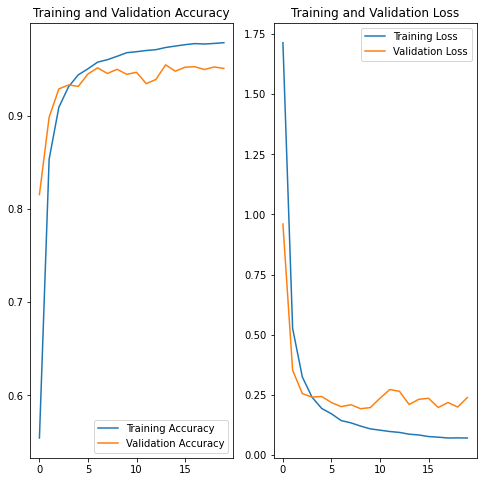

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.evaluate(x= test_data["Features"], y= test_data["Labels"])

395/395 [==============================] - 1s 4ms/step - loss: 0.2489 - accuracy: 0.9444


[0.24885165691375732, 0.9444180727005005]

In [ ]:
img2 = test_data['Features'][529]
img = np.expand_dims(test_data['Features'][529], 0)
a = model.predict(img)
print(a)
print(test_data['Labels'][529])
plt.imshow(img2, cmap  ='gray')